# 01&2 Import libraries and data

In [20]:
import quandl
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [21]:
#folder shortcut

path = r'/Users/yukbuinnemtat/Desktop/Task 6 Folder'

In [22]:
citi = pd.read_csv(os.path.join(path, '02 Data','Prepared data', 'citi_b.csv'), index_col = False)

In [23]:
citi.head()

,Unnamed: 0,days_of_the_week,start_hour,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_date,end_date,end_hour,start_time
0,0,Mon,18,W 38 St & 8 Ave,40.754666,-73.991382,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,Female,2013-09-09,2013-09-09,18,2013-09-09 18:00:00
1,1,Thu,18,Lispenard St & Broadway,40.719392,-74.002472,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,Male,2013-09-12,2013-09-12,18,2013-09-12 18:00:00
2,2,Wed,19,9 Ave & W 45 St,40.760193,-73.991255,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,Male,2013-09-18,2013-09-18,19,2013-09-18 19:00:00
3,3,Sat,11,E 33 St & 1 Ave,40.743156,-73.974347,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,Female,2013-09-28,2013-09-28,12,2013-09-28 11:00:00
4,4,Fri,22,Lafayette St & E 8 St,40.730287,-73.990765,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,Female,2013-09-27,2013-09-27,22,2013-09-27 22:00:00


In [24]:
# Define data types for specific columns
data_types = {
    'start_date': 'datetime64'
}

In [25]:
file_path = os.path.join(path, '02 Data','Prepared data','citi_b.csv')

In [26]:
parse_dates = ['start_date']

In [27]:
citi = pd.read_csv(file_path, parse_dates=parse_dates)

In [28]:
citi.head()

,Unnamed: 0,days_of_the_week,start_hour,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_date,end_date,end_hour,start_time
0,0,Mon,18,W 38 St & 8 Ave,40.754666,-73.991382,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,Female,2013-09-09,2013-09-09,18,2013-09-09 18:00:00
1,1,Thu,18,Lispenard St & Broadway,40.719392,-74.002472,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,Male,2013-09-12,2013-09-12,18,2013-09-12 18:00:00
2,2,Wed,19,9 Ave & W 45 St,40.760193,-73.991255,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,Male,2013-09-18,2013-09-18,19,2013-09-18 19:00:00
3,3,Sat,11,E 33 St & 1 Ave,40.743156,-73.974347,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,Female,2013-09-28,2013-09-28,12,2013-09-28 11:00:00
4,4,Fri,22,Lafayette St & E 8 St,40.730287,-73.990765,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,Female,2013-09-27,2013-09-27,22,2013-09-27 22:00:00


In [29]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               42993 non-null  int64         
 1   days_of_the_week         42993 non-null  object        
 2   start_hour               42993 non-null  int64         
 3   start_station_name       42993 non-null  object        
 4   start_station_latitude   42993 non-null  float64       
 5   start_station_longitude  42993 non-null  float64       
 6   end_station_name         42993 non-null  object        
 7   end_station_latitude     42993 non-null  float64       
 8   end_station_longitude    42993 non-null  float64       
 9   trip_duration            42993 non-null  int64         
 10  subscriber               42993 non-null  object        
 11  birth_year               42993 non-null  float64       
 12  gender                   42993 n

# 03. Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to (if there are irrelevant historical events in your data that would bias your analysis, for example). Also, make sure your set doesn’t include any forecasted data.
### In a markdown cell below the subset (if you make one), explain what logic you were following when selecting your data points.
### Remember that if you subset your data, you’ll need to reset the index, subset, then reset the “Date” column as your index in the new dataframe.Data wrangling and data subsetting

In [30]:
# Average trip duration per day
avg_ride_duration_day = citi.groupby('start_date')['trip_duration'].mean()

In [31]:
avg_ride_duration_day

start_date
2013-09-01    835.948586
2013-09-02    751.578735
2013-09-03    762.576951
2013-09-04    788.075178
2013-09-05    782.700348
2013-09-06    770.536137
2013-09-07    828.083817
2013-09-08    836.929519
2013-09-09    795.318763
2013-09-10    754.354800
2013-09-11    728.728418
2013-09-12    744.394718
2013-09-13    756.957084
2013-09-14    788.970906
2013-09-15    811.159806
2013-09-16    746.375744
2013-09-17    742.269602
2013-09-18    757.105294
2013-09-19    745.649327
2013-09-20    757.693303
2013-09-21    781.492671
2013-09-22    806.885816
2013-09-23    757.755299
2013-09-24    742.678819
2013-09-25    778.845146
2013-09-26    733.993111
2013-09-27    772.560853
2013-09-28    816.695260
2013-09-29    785.908778
2013-09-30    751.789316
Name: trip_duration, dtype: float64

In [32]:
day_counts = citi.groupby( citi['start_date'].dt.date)['start_date'].count()

In [33]:
day_counts

start_date
2013-09-01     778
2013-09-02     743
2013-09-03    1397
2013-09-04    1543
2013-09-05    1435
2013-09-06    1522
2013-09-07    1205
2013-09-08    1206
2013-09-09    1487
2013-09-10    1646
2013-09-11    1587
2013-09-12    1401
2013-09-13    1701
2013-09-14    1203
2013-09-15    1239
2013-09-16    1344
2013-09-17    1658
2013-09-18    1681
2013-09-19    1634
2013-09-20    1777
2013-09-21    1228
2013-09-22    1121
2013-09-23    1557
2013-09-24    1728
2013-09-25    1679
2013-09-26    1742
2013-09-27    1594
2013-09-28    1329
2013-09-29    1162
2013-09-30    1666
Name: start_date, dtype: int64

In [34]:
# Remove unnecessary columns

columns_to_drop = ['Unnamed: 0', 'start_time']
citi_dropped = citi.drop(columns=columns_to_drop)

In [35]:
citi_dropped.head()

,days_of_the_week,start_hour,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_date,end_date,end_hour
0,Mon,18,W 38 St & 8 Ave,40.754666,-73.991382,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,Female,2013-09-09,2013-09-09,18
1,Thu,18,Lispenard St & Broadway,40.719392,-74.002472,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,Male,2013-09-12,2013-09-12,18
2,Wed,19,9 Ave & W 45 St,40.760193,-73.991255,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,Male,2013-09-18,2013-09-18,19
3,Sat,11,E 33 St & 1 Ave,40.743156,-73.974347,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,Female,2013-09-28,2013-09-28,12
4,Fri,22,Lafayette St & E 8 St,40.730287,-73.990765,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,Female,2013-09-27,2013-09-27,22


In [54]:
outcome = pd.DataFrame({'date': day_counts.index, 'ride_count': day_counts.values, 'avg_duration': avg_ride_duration_day.values})

In [55]:
outcome

,date,ride_count,avg_duration
0,2013-09-01,778,835.948586
1,2013-09-02,743,751.578735
2,2013-09-03,1397,762.576951
3,2013-09-04,1543,788.075178
4,2013-09-05,1435,782.700348
5,2013-09-06,1522,770.536137
6,2013-09-07,1205,828.083817
7,2013-09-08,1206,836.929519
8,2013-09-09,1487,795.318763
9,2013-09-10,1646,754.354800


In [38]:
outcome.shape

(30, 3)

In [39]:
outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          30 non-null     object 
 1   ride_count    30 non-null     int64  
 2   avg_duration  30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


In [40]:
from datetime import datetime

outcome_1 = pd.DataFrame(outcome)

# Convert the "date" column to datetime
outcome_1['datetime'] = pd.to_datetime(outcome_1['date']) 

# Set the "datetime" column as the index
outcome_1 = outcome_1.set_index('datetime') 

# Drop the original "date" column
outcome_1.drop(['date'], axis=1, inplace=True)

# Display the resulting DataFrame
outcome_1.head()

,ride_count,avg_duration
datetime,,
2013-09-01,778,835.948586
2013-09-02,743,751.578735
2013-09-03,1397,762.576951
2013-09-04,1543,788.075178
2013-09-05,1435,782.700348


###### Since, this is the start periods of the months, it would be possible to predict the outcome of the following months from these after observing the duration a ride count has per month

# 04. Create a line chart of your data.

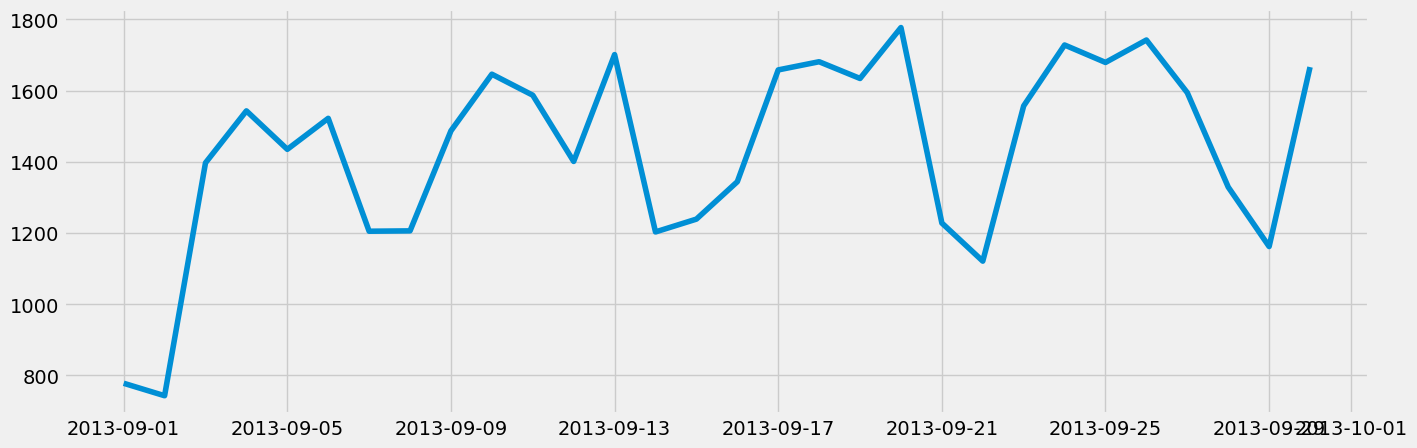

In [41]:
# Line chart on ride per day of start date of the month
plt.figure(figsize=(15,5), dpi=100)
plt.plot(day_counts)

# 05. Decompose the data’s components.
##### Analyze the results from the plot in a markdown cell.

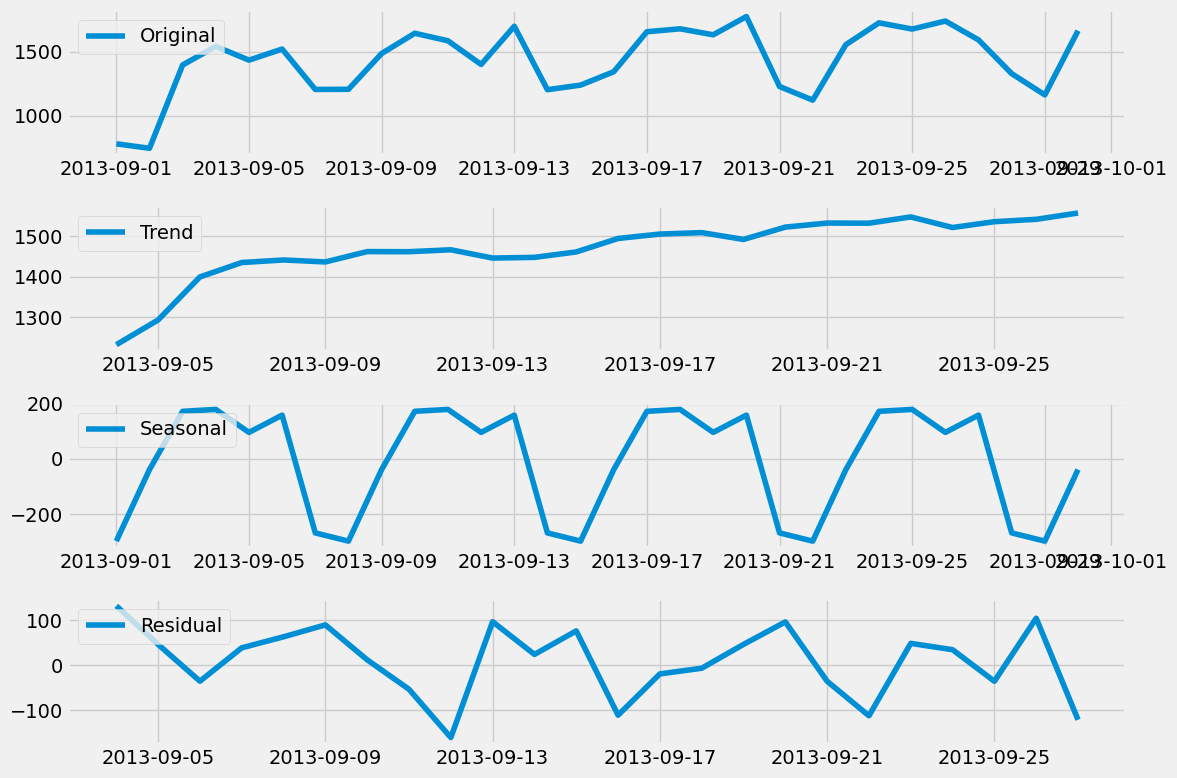

In [42]:
# Specify the seasonal period (7 for weekly seasonality)
period = 7

# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(outcome_1['ride_count'], model='additive', period=period)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(outcome_1['ride_count'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()

# Show the plots
plt.show()

#### Smoothing is needed as observed the original and the trend are different. There is an increase in riders as months moves ahead, observed from the upward movement of the trend.
#### Seasonality appears to be present in this data reprsented by spike in curves that change at intervals.
#### From observation,there is no particular trend or patterns in the residuals, noise is present but not constant.

# 06. Conduct a Dickey-Fuller test to check for stationarity.
### Interpret the results in a markdown cell and reference your null hypothesis.

In [43]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(outcome_1['ride_count'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.640922
p-value                         0.005025
Number of Lags Used             6.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


#### With reference to the null hypothesis in the Dickey-Fuller test, the data is non-stationary.
#### p-value (0.005025): The p-value is less than 0.05 (commonly used significance level), which means it's statistically significant.
#### Test Statistic (-3.640922): The test statistic is more negative than the critical values at the 1%, 5%, and 10% significance levels.
#### Conclusion: With a p-value of 0.005025 (less than 0.05) and a test statistic of -3.640922 (more negative than the critical values), you can reject the null hypothesis of non-stationarity.
#### Interpretation: The data appears to be stationary. This suggests that there are no significant trends or seasonality patterns in the time series, and it satisfies the stationarity assumption often required for time series analysis.

# 09. Check your data’s autocorrelations.

<Figure size 1200x600 with 0 Axes>

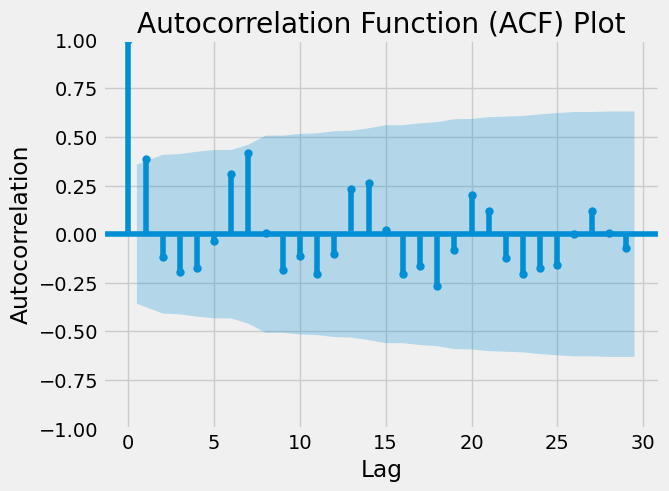

In [44]:
from statsmodels.graphics.tsaplots import plot_acf

ts = outcome_1['ride_count']

# Create the ACF plot
plt.figure(figsize=(12, 6))  # Set the figure size (optional)
plot_acf(ts, lags=29)  # Adjust 'lags' as needed
plt.title("Autocorrelation Function (ACF) Plot")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)

# Display the ACF plot
plt.show()


In [56]:
outcome['date'] = pd.to_datetime(outcome['date'])

In [57]:
citi_12 = citi.merge(outcome, left_on='start_date', right_on='date', how='left')

In [58]:
citi_12

,Unnamed: 0,days_of_the_week,start_hour,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_date,end_date,end_hour,start_time,date,ride_count,avg_duration
0,0,Mon,18,W 38 St & 8 Ave,40.754666,-73.991382,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,Female,2013-09-09,2013-09-09,18,2013-09-09 18:00:00,2013-09-09,1487,795.318763
1,1,Thu,18,Lispenard St & Broadway,40.719392,-74.002472,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,Male,2013-09-12,2013-09-12,18,2013-09-12 18:00:00,2013-09-12,1401,744.394718
2,2,Wed,19,9 Ave & W 45 St,40.760193,-73.991255,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,Male,2013-09-18,2013-09-18,19,2013-09-18 19:00:00,2013-09-18,1681,757.105294
3,3,Sat,11,E 33 St & 1 Ave,40.743156,-73.974347,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,Female,2013-09-28,2013-09-28,12,2013-09-28 11:00:00,2013-09-28,1329,816.695260
4,4,Fri,22,Lafayette St & E 8 St,40.730287,-73.990765,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,Female,2013-09-27,2013-09-27,22,2013-09-27 22:00:00,2013-09-27,1594,772.560853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42988,42988,Sat,15,W 21 St & 6 Ave,40.741740,-73.994156,W 37 St & 10 Ave,40.756604,-73.997901,975,Subscriber,1973.0,Male,2013-09-28,2013-09-28,15,2013-09-28 15:00:00,2013-09-28,1329,816.695260
42989,42989,Sun,16,Spruce St & Nassau St,40.711464,-74.005524,E 2 St & Avenue B,40.722174,-73.983688,1541,Subscriber,1975.0,Male,2013-09-01,2013-09-01,16,2013-09-01 16:00:00,2013-09-01,778,835.948586
42990,42990,Sat,17,Johnson St & Gold St,40.694749,-73.983625,Cleveland Pl & Spring St,40.721816,-73.997203,1191,Subscriber,1970.0,Female,2013-09-14,2013-09-14,17,2013-09-14 17:00:00,2013-09-14,1203,788.970906
42991,42991,Sat,18,Broadway & E 22 St,40.740343,-73.989551,W 43 St & 6 Ave,40.755273,-73.983169,1050,Subscriber,1961.0,Female,2013-09-07,2013-09-07,18,2013-09-07 18:00:00,2013-09-07,1205,828.083817


In [59]:
citi_12.to_csv('citi_12.csv', index=False)